<a href="https://colab.research.google.com/github/LucasMirandaVS/projeto_time_series_analisys_covid/blob/main/Previs%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pacotes

In [1]:
!pip install -q statsmodels==0.12.1

In [2]:
# Limpeza e dataviz
import numpy as np
import pandas as pd
import datetime as date
import matplotlib.pyplot as plt
import seaborn as sns

# filtrando os avisos do console
import warnings
warnings.filterwarnings('ignore')

# Testes estatísticos
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import itertools 
import statsmodels.api as sm

# Importando os dados

In [81]:
url = 'https://github.com/alura-cursos/Alura-COVID2/raw/main/casos-brasil.csv'
df = pd.read_csv(url,index_col=0,parse_dates=[0])

In [82]:
df['data'] = pd.to_datetime(df['data'])
df['data'] = pd.to_datetime(df.data).dt.date
df.tail()

,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
semana,,,,,,,,,,,,,,,,,
31,2020-07-31,Brazil,SC,TOTAL,59,1102,3169,84073,1102,84073,15.38078,1173.41923,0.01311,70601.0,9573.0,282607.0,3944.38747
31,2020-07-31,Brazil,SE,TOTAL,26,1434,1029,58713,1434,58713,62.38319,2554.18724,0.02442,30937.0,6466.0,93587.0,4071.30825
31,2020-07-31,Brazil,SP,TOTAL,287,22997,13298,542304,22997,542304,50.08161,1181.00007,0.04241,351610.0,340112.0,1788225.0,3894.29886
31,2020-07-31,Brazil,TO,TOTAL,9,390,522,25346,381,24824,24.79550,1611.45323,0.01539,15035.0,8367.0,33685.0,2141.63190
31,2020-07-31,Brazil,TOTAL,TOTAL,1267,92728,53264,2670451,92475,2662485,44.12528,1270.75305,0.03472,2008854.0,1079525.0,6988772.0,3325.65673


# Selecionando os dados de interesse

In [83]:
# estados de interesse
df_sp = df[df['estado'] == 'SP']
df_mg = df[df['estado'] == 'MG']
df_rj = df[df['estado'] == 'RJ']
df_es = df[df['estado'] == 'ES']

In [84]:
# Conferindo que a coluna de data é um objeto date
df_sp.index = pd.to_datetime(df_sp.data)
df_mg.index = pd.to_datetime(df_mg.data)
df_rj.index = pd.to_datetime(df_rj.data)
df_es.index = pd.to_datetime(df_es.data)

In [85]:
# selecionando apenas os estados
y = df_sp['Casos']
z = df_mg['Casos']
x = df_rj['Casos']
a = df_es['Casos']

# ARIMA e SARIMA

In [86]:
# Definindo os parametros do modelo
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))

In [87]:
# Definindo o componente de sazonalidade
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]

In [88]:
# testando a função
print('Exemplo de combinação de parâmetros para o ARIMA Sazonal')
print('SARIMAX: {} x {}'.format(pdq[0],seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[0],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[0],seasonal_pdq[2]))

Exemplo de combinação de parâmetros para o ARIMA Sazonal
SARIMAX: (0, 0, 0) x (0, 0, 0, 7)
SARIMAX: (0, 0, 0) x (0, 0, 1, 7)
SARIMAX: (0, 0, 0) x (0, 1, 0, 7)


#### Calculando o AIC

In [89]:
aic_lista_sp = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y,
                                       order=param,
                                       seasonal_order=param_seasonal)
        results_sp = mod.fit()
        aic_lista_sp.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results_sp.aic))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

In [90]:
aic_lista_sp

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC4312.204463385908',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC4234.919433193472',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC3562.871711196248',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC3494.1582680755455',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC3848.3218408698044',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC3640.408779393819',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC3149.4472596313217',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC3148.656017413286',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC4203.637153158772',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC4186.578948235436',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC3367.092780686922',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC3273.0519384882145',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC4175.643287397979',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC4177.53354628747',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC3252.353119481565',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC3281.1217326361584',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC3140.724225355021',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC3055.2982248348067',
 'ARI

In [91]:
# Calculando o modelo p sp
mod_sp = sm.tsa.statespace.SARIMAX(y,
                               order = (1,1,1),
                               seasonal_order=(1,1,1,7))
results_sp = mod_sp.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


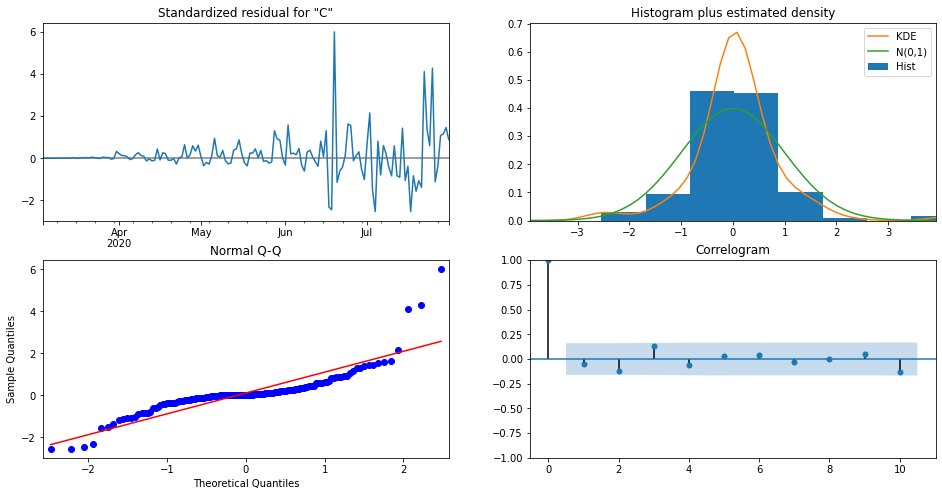

In [92]:
results_sp.plot_diagnostics(figsize=(16,8))
plt.show()

In [93]:
# Agora para MG
aic_lista_mg = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(z,
                                       order=param,
                                       seasonal_order=param_seasonal)
        results_mg = mod.fit()
        aic_lista_mg.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results_mg.aic))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

In [94]:
aic_lista_mg

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC3528.940749402163',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC3461.250719576284',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC2933.7304131623796',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC2807.65654226091',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC4.0',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC2992.721333403365',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC2527.21909942243',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC2525.9422392915703',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC3338.3804997135726',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC3209.9053575527414',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC2766.1027276379987',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC2679.436093336394',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC2972.3114690063935',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC2873.3325017089605',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC2438.383989914558',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC2534.1243288604414',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC2530.9973643461244',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC2443.2911973233236',
 'ARIMA(0, 1, 0)

In [95]:
# Calculando o modelo p MG
mod_mg = sm.tsa.statespace.SARIMAX(z,
                               order = (1,1,1),
                               seasonal_order=(0,1,1,7))
results_mg = mod_mg.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


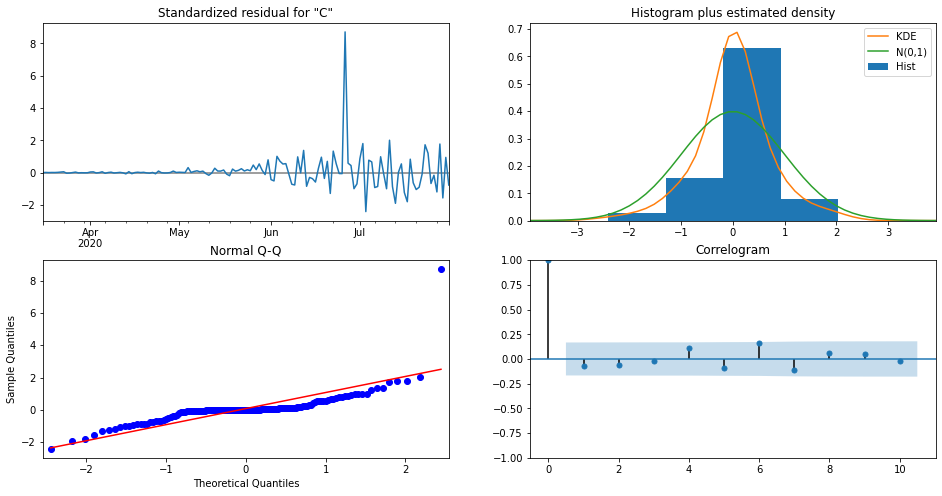

In [96]:
results_mg.plot_diagnostics(figsize=(16,8))
plt.show()

In [97]:
# Agora para RJ
aic_lista_rj = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(x,
                                       order=param,
                                       seasonal_order=param_seasonal)
        results_rj = mod.fit()
        aic_lista_rj.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results_rj.aic))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

In [98]:
aic_lista_rj

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC3772.423229220175',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC3698.4316749760765',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC3020.6690037983653',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC2907.0626034044813',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC4.0',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC3092.6881977418498',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC2742.973899839046',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC2734.0546460843934',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC3670.4515504256547',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC3467.2103613851386',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC2862.4158772592277',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC2797.855362545988',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC3643.6559246673623',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC3645.434067068668',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC2662.0644676561083',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC2639.2121638131757',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC2610.5998888805852',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC2562.900130664373',
 'ARIMA(0, 1

In [106]:
# Calculando o modelo p RJ
mod_rj = sm.tsa.statespace.SARIMAX(x,
                               order = (1,1,1),
                               seasonal_order=(0,1,1,7))
results_rj = mod_rj.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


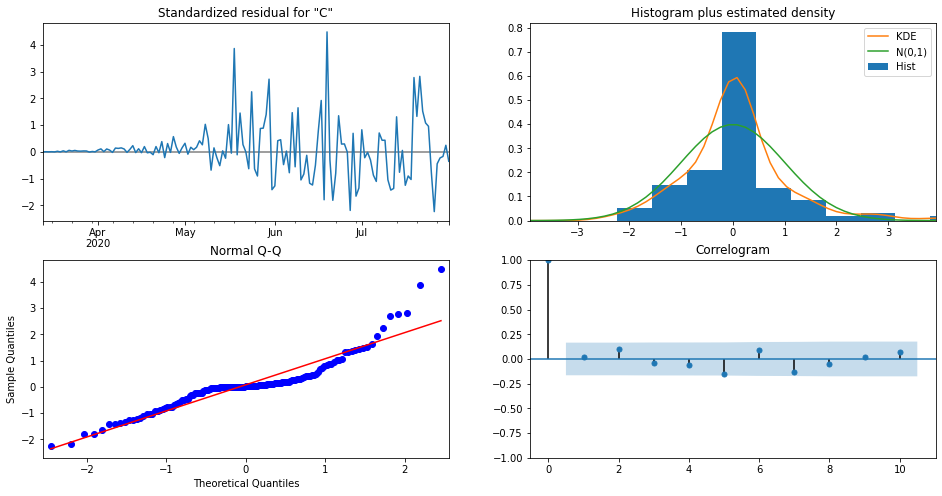

In [107]:
results_rj.plot_diagnostics(figsize=(16,8))
plt.show()

In [108]:
# ES
aic_lista_es = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(a,
                                       order=param,
                                       seasonal_order=param_seasonal)
        results_es = mod.fit()
        aic_lista_es.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results_es.aic))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

In [102]:
aic_lista_es

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC3511.5832234170043',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC3439.3928740741703',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC2821.9528441092243',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC2658.706361193663',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC4.0',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC2837.719261682669',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC2367.361751724525',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC2356.0440389680984',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC3316.4303737273176',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC3159.3605759659795',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC2645.757637407217',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC2523.7222339439218',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC2816.9085251565207',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC3386.374408621409',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC2274.919562317019',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC2478.6254211279384',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC2388.25864037828',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC2281.109556192885',
 'ARIMA(0, 1, 0)

In [103]:
# Calculando o modelo p ES
mod_es = sm.tsa.statespace.SARIMAX(a,
                               order = (1,1,1),
                               seasonal_order=(0,1,1,7))
results_es = mod_es.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


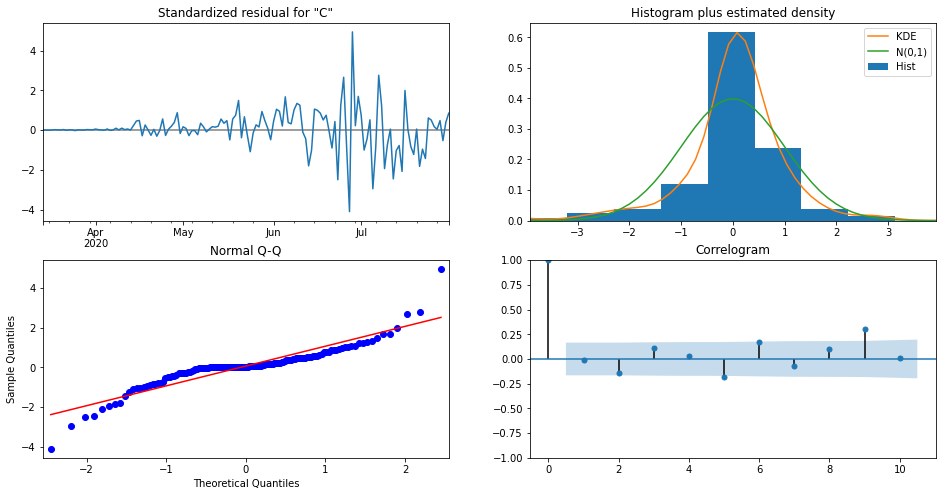

In [104]:
results_es.plot_diagnostics(figsize=(16,8))
plt.show()

# Realizando as previsões

In [38]:
# Dados atualizados
url = 'https://raw.githubusercontent.com/alura-cursos/Alura-COVID2/main/cases-brazil-states-att.csv' 
df_att = pd.read_csv(url,index_col=0,parse_dates=[0])

### São Paulo

In [27]:
pred_sp = results_sp.get_prediction(start=pd.to_datetime('2020-07-01'),dynamic=False)
pred_sp_ic = pred_sp.conf_int()
pred_sp_ic

,lower Casos,upper Casos
2020-07-01,284123.459814,292788.122206
2020-07-02,293087.110159,301751.770126
2020-07-03,309712.937395,318377.595251
2020-07-04,313808.527316,322473.183334
2020-07-05,314049.610162,322714.264581
2020-07-06,320494.657540,329159.310568
2020-07-07,327045.791196,335710.444062
2020-07-08,336585.425827,345250.077469
2020-07-09,346345.128668,355009.779111
2020-07-10,356625.598219,365290.247619


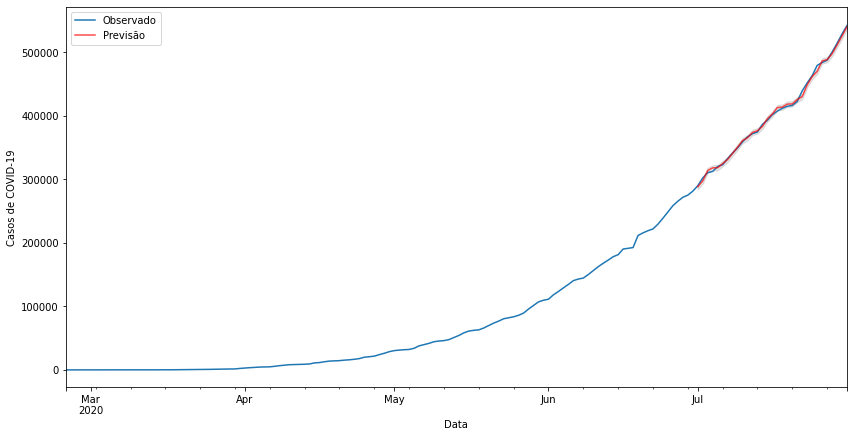

In [28]:
ax = y['2020':].plot(label='Observado')
pred_sp.predicted_mean.plot(ax=ax, label='Previsão', color='r', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_sp_ic.index, pred_sp_ic.iloc[:,0], pred_sp_ic.iloc[:,1], color='k',alpha=0.1)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19')
plt.legend()
plt.show()

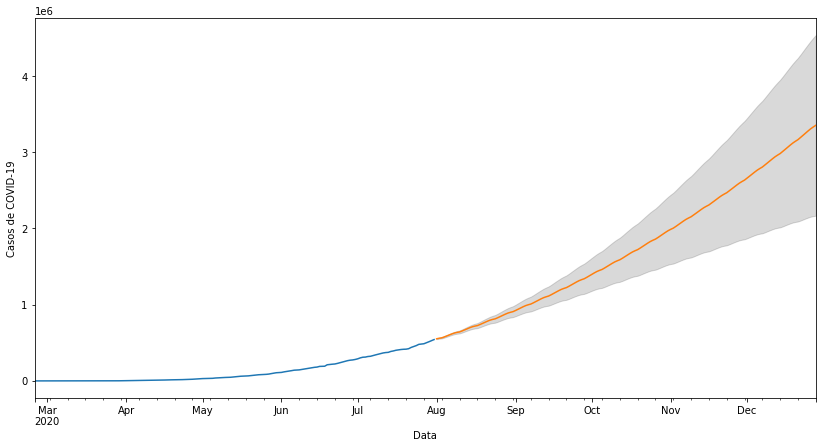

In [29]:
# Previsão
pred_uc_sp = results_sp.get_forecast(steps=150) # 50 dias
pred_ic = pred_uc_sp.conf_int()
ax = y.plot(label='Observado', figsize=(14,7))
pred_uc_sp.predicted_mean.plot(ax=ax,label='Previsto')
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0],pred_ic.iloc[:,1],color='k',alpha=0.15)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19')
plt.show()

In [39]:
# Setando os dados atualizados de são paulo
df_att_sp = df_att[df_att['state'] == 'SP']
df_att_sp = df_att_sp.rename(columns = {'date':'data'})
df_att_sp.head()

,data,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
epi_week,,,,,,,,,,,,,,,,,
9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [40]:
# Setando a data
df_att_sp['data'] = pd.to_datetime(df_att_sp['data']).dt.date
df_att_sp.index = df_att_sp['data']
df_att_sp.head()

,data,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
data,,,,,,,,,,,,,,,,,
2020-02-25,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-26,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-27,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-28,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
2020-02-29,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


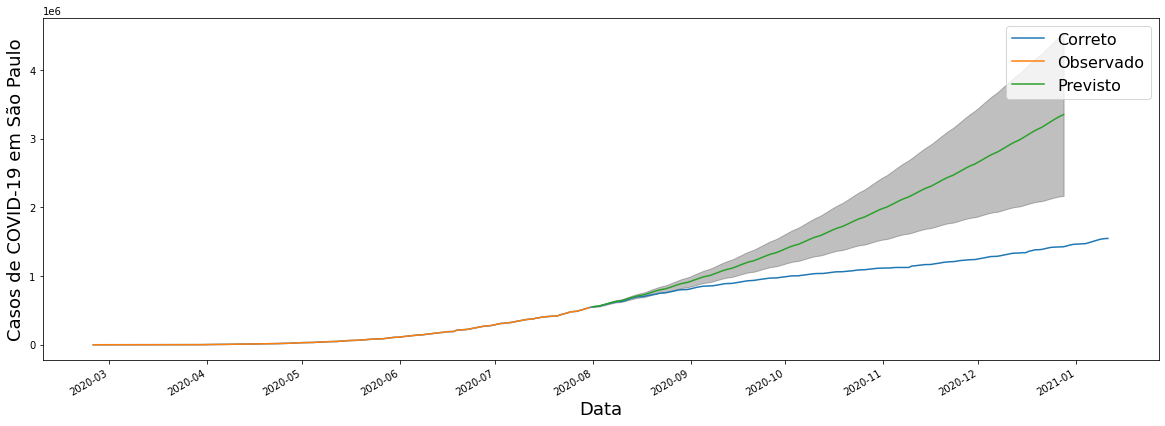

In [114]:
o = df_att_sp['totalCases']
plt.figure(figsize=(20,7))
fig = plt.plot(o,label='Correto')
ax = y.plot(label='Observado')
pred_uc_sp.predicted_mean.plot(ax=ax, label='Previsto')
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0],pred_ic.iloc[:,1], color='k',alpha=0.25)
ax.set_xlabel('Data',fontsize=18)
ax.set_ylabel('Casos de COVID-19 em São Paulo',fontsize=18)
plt.legend(fontsize=16)

### Minas Gerais

In [35]:
pred_mg = results_mg.get_prediction(start=pd.to_datetime('2020-07-01'),dynamic=False)
pred_mg_ic = pred_mg.conf_int()
pred_mg_ic

,lower Casos,upper Casos
2020-07-01,46072.308682,48171.721004
2020-07-02,48694.029216,50793.441412
2020-07-03,53593.510136,55692.922233
2020-07-04,54495.957586,56595.369605
2020-07-05,56878.701278,58978.113255
2020-07-06,59070.832965,61170.244848
2020-07-07,60307.593313,62407.005109
2020-07-08,62458.824432,64558.236161
2020-07-09,65839.652414,67939.064090
2020-07-10,69571.120791,71670.532425


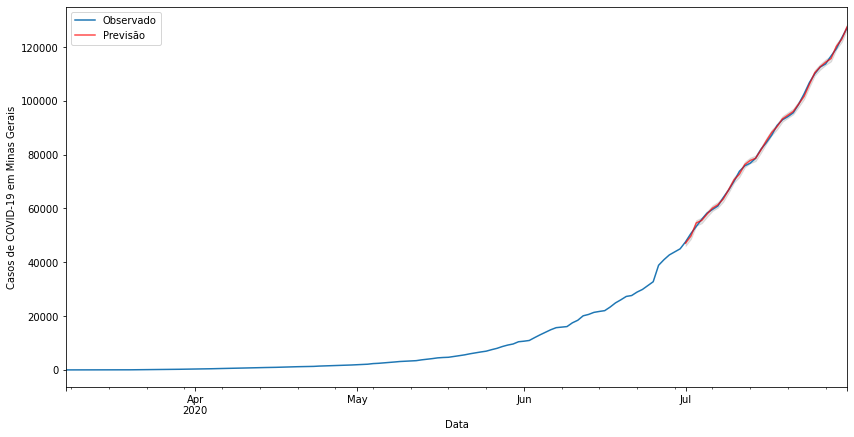

In [42]:
ax = z['2020':].plot(label='Observado')
pred_mg.predicted_mean.plot(ax=ax, label='Previsão', color='r', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_mg_ic.index, pred_mg_ic.iloc[:,0], pred_mg_ic.iloc[:,1], color='k',alpha=0.1)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19 em Minas Gerais')
plt.legend()
plt.show()

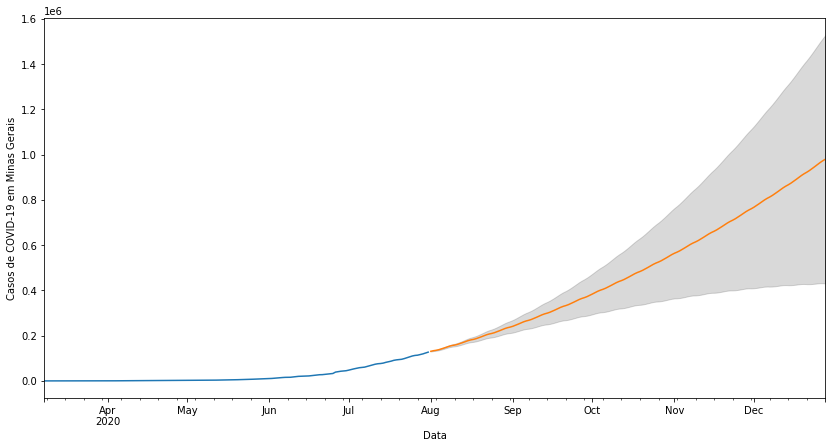

In [37]:
# Previsão
pred_uc_mg = results_mg.get_forecast(steps=150) # 150 dias
pred_ic_mg = pred_uc_mg.conf_int()
ax = z.plot(label='Observado', figsize=(14,7))
pred_uc_mg.predicted_mean.plot(ax=ax,label='Previsto')
ax.fill_between(pred_ic_mg.index, pred_ic_mg.iloc[:,0],pred_ic_mg.iloc[:,1],color='k',alpha=0.15)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19 em Minas Gerais')
plt.show()

In [43]:
df_att_mg = df_att[df_att['state'] == 'MG']
df_att_mg = df_att_mg.rename(columns = {'date':'data'})
df_att_mg.head()

,data,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
epi_week,,,,,,,,,,,,,,,,,
11,2020-03-08,Brazil,MG,TOTAL,0,0,1,1,0,1,0.0,0.00472,0.0,NaN,NaN,NaN,NaN
11,2020-03-09,Brazil,MG,TOTAL,0,0,0,1,0,1,0.0,0.00472,0.0,NaN,NaN,NaN,NaN
11,2020-03-10,Brazil,MG,TOTAL,0,0,0,1,0,1,0.0,0.00472,0.0,NaN,NaN,NaN,NaN
11,2020-03-11,Brazil,MG,TOTAL,0,0,0,1,0,1,0.0,0.00472,0.0,NaN,NaN,NaN,NaN
11,2020-03-12,Brazil,MG,TOTAL,0,0,1,2,0,1,0.0,0.00945,0.0,NaN,NaN,NaN,NaN


In [44]:
# Setando a data
df_att_mg['data'] = pd.to_datetime(df_att_mg['data']).dt.date
df_att_mg.index = df_att_mg['data']
df_att_mg.head()

,data,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
data,,,,,,,,,,,,,,,,,
2020-03-08,2020-03-08,Brazil,MG,TOTAL,0,0,1,1,0,1,0.0,0.00472,0.0,NaN,NaN,NaN,NaN
2020-03-09,2020-03-09,Brazil,MG,TOTAL,0,0,0,1,0,1,0.0,0.00472,0.0,NaN,NaN,NaN,NaN
2020-03-10,2020-03-10,Brazil,MG,TOTAL,0,0,0,1,0,1,0.0,0.00472,0.0,NaN,NaN,NaN,NaN
2020-03-11,2020-03-11,Brazil,MG,TOTAL,0,0,0,1,0,1,0.0,0.00472,0.0,NaN,NaN,NaN,NaN
2020-03-12,2020-03-12,Brazil,MG,TOTAL,0,0,1,2,0,1,0.0,0.00945,0.0,NaN,NaN,NaN,NaN


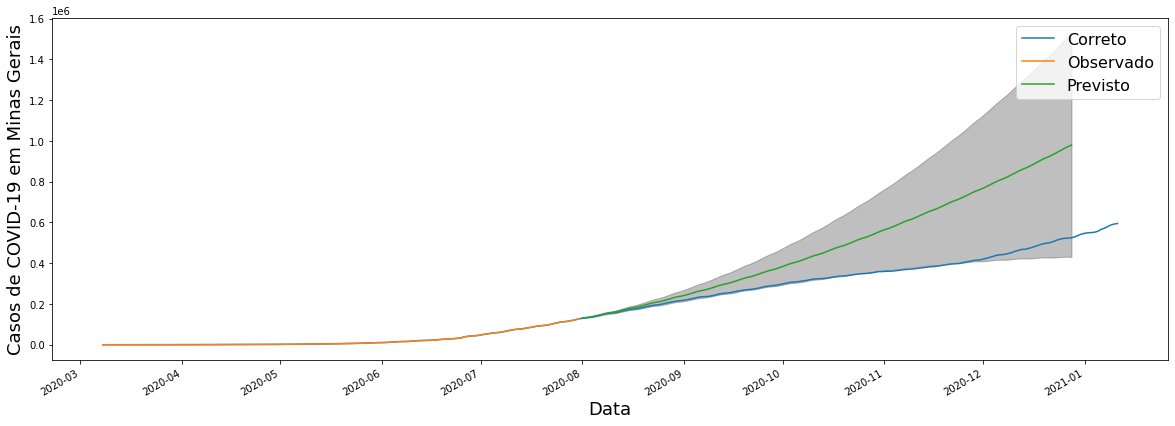

In [115]:
o = df_att_mg['totalCases']
plt.figure(figsize=(20,7))
fig = plt.plot(o,label='Correto')
ax = z.plot(label='Observado')
pred_uc_mg.predicted_mean.plot(ax=ax, label='Previsto')
ax.fill_between(pred_ic_mg.index, pred_ic_mg.iloc[:,0],pred_ic_mg.iloc[:,1], color='k',alpha=0.25)
ax.set_xlabel('Data',fontsize=18)
ax.set_ylabel('Casos de COVID-19 em Minas Gerais',fontsize=18)
plt.legend(fontsize=16)

### Rio de Janeiro

In [116]:
pred_rj = results_rj.get_prediction(start=pd.to_datetime('2020-07-01'),dynamic=False)
pred_rj_ic = pred_rj.conf_int()
pred_rj_ic

,lower Casos,upper Casos
2020-07-01,112690.244174,116331.388631
2020-07-02,115207.586899,118847.020724
2020-07-03,117154.731243,120791.656141
2020-07-04,118904.336428,122540.882814
2020-07-05,120283.737027,123920.029933
2020-07-06,121086.439350,124722.567027
2020-07-07,121612.793186,125248.817081
2020-07-08,124110.107061,127746.069124
2020-07-09,126103.596715,129738.042084
2020-07-10,128595.159268,132227.363433


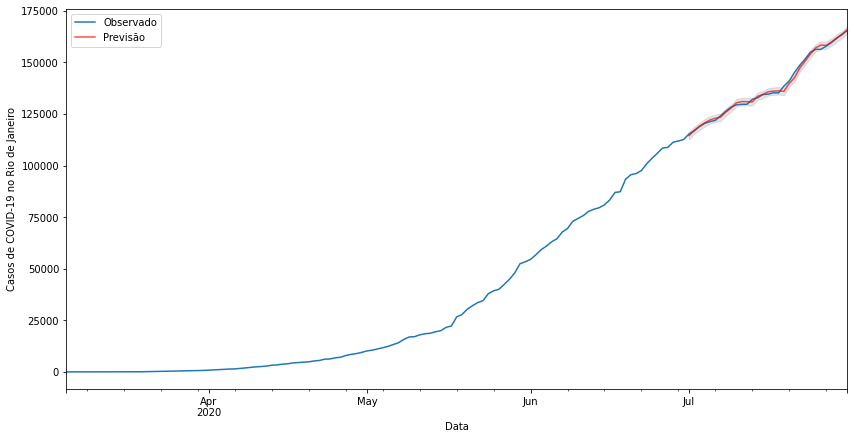

In [117]:
ax = x['2020':].plot(label='Observado')
pred_rj.predicted_mean.plot(ax=ax, label='Previsão', color='r', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_rj_ic.index, pred_rj_ic.iloc[:,0], pred_rj_ic.iloc[:,1], color='k',alpha=0.1)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19 no Rio de Janeiro')
plt.legend()
plt.show()

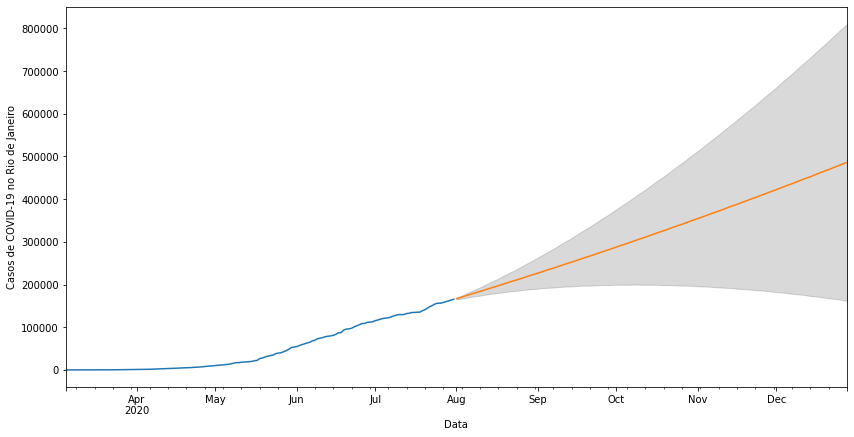

In [118]:
# Previsão
pred_uc_rj = results_rj.get_forecast(steps=150) # 150 dias
pred_ic_rj = pred_uc_rj.conf_int()
ax = x.plot(label='Observado', figsize=(14,7))
pred_uc_rj.predicted_mean.plot(ax=ax,label='Previsto')
ax.fill_between(pred_ic_rj.index, pred_ic_rj.iloc[:,0],pred_ic_rj.iloc[:,1],color='k',alpha=0.15)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19 no Rio de Janeiro')
plt.show()

In [119]:
df_att_rj = df_att[df_att['state'] == 'RJ']
df_att_rj = df_att_rj.rename(columns = {'date':'data'})
df_att_rj.head()

,data,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
epi_week,,,,,,,,,,,,,,,,,
10,2020-03-05,Brazil,RJ,TOTAL,0,0,1,1,0,1,0.0,0.00579,0.0,NaN,NaN,NaN,NaN
10,2020-03-06,Brazil,RJ,TOTAL,0,0,1,2,0,1,0.0,0.01158,0.0,NaN,NaN,NaN,NaN
10,2020-03-07,Brazil,RJ,TOTAL,0,0,0,2,0,2,0.0,0.01158,0.0,NaN,NaN,NaN,NaN
11,2020-03-08,Brazil,RJ,TOTAL,0,0,1,3,0,3,0.0,0.01738,0.0,NaN,NaN,NaN,NaN
11,2020-03-09,Brazil,RJ,TOTAL,0,0,0,3,0,3,0.0,0.01738,0.0,NaN,NaN,NaN,NaN


In [120]:
# Setando a data
df_att_rj['data'] = pd.to_datetime(df_att_rj['data']).dt.date
df_att_rj.index = df_att_rj['data']
df_att_rj.head()

,data,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
data,,,,,,,,,,,,,,,,,
2020-03-05,2020-03-05,Brazil,RJ,TOTAL,0,0,1,1,0,1,0.0,0.00579,0.0,NaN,NaN,NaN,NaN
2020-03-06,2020-03-06,Brazil,RJ,TOTAL,0,0,1,2,0,1,0.0,0.01158,0.0,NaN,NaN,NaN,NaN
2020-03-07,2020-03-07,Brazil,RJ,TOTAL,0,0,0,2,0,2,0.0,0.01158,0.0,NaN,NaN,NaN,NaN
2020-03-08,2020-03-08,Brazil,RJ,TOTAL,0,0,1,3,0,3,0.0,0.01738,0.0,NaN,NaN,NaN,NaN
2020-03-09,2020-03-09,Brazil,RJ,TOTAL,0,0,0,3,0,3,0.0,0.01738,0.0,NaN,NaN,NaN,NaN


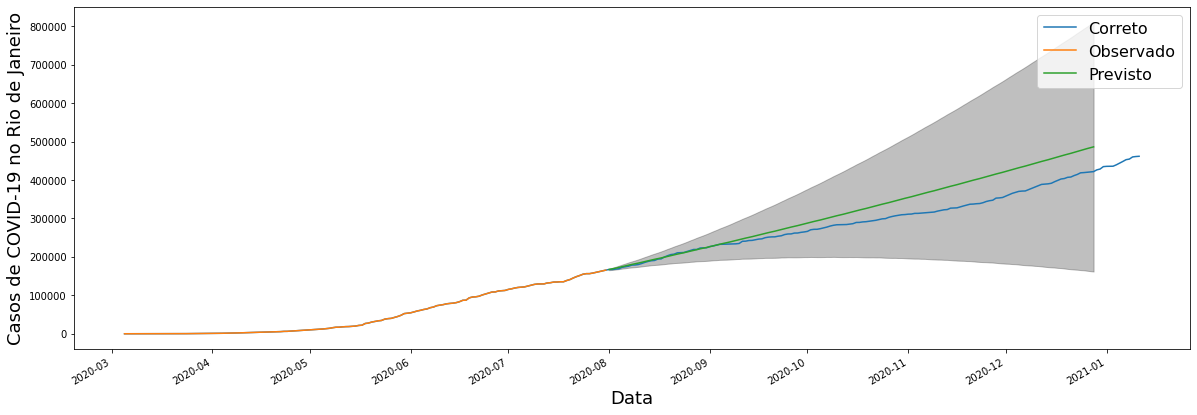

In [121]:
o = df_att_rj['totalCases']
plt.figure(figsize=(20,7))
fig = plt.plot(o,label='Correto')
ax = x.plot(label='Observado')
pred_uc_rj.predicted_mean.plot(ax=ax, label='Previsto')
ax.fill_between(pred_ic_rj.index, pred_ic_rj.iloc[:,0],pred_ic_rj.iloc[:,1], color='k',alpha=0.25)
ax.set_xlabel('Data',fontsize=18)
ax.set_ylabel('Casos de COVID-19 no Rio de Janeiro',fontsize=18)
plt.legend(fontsize=16)

### Espírito Santo

In [122]:
pred_es = results_es.get_prediction(start=pd.to_datetime('2020-07-01'),dynamic=False)
pred_es_ic = pred_es.conf_int()
pred_es_ic

,lower Casos,upper Casos
2020-07-01,48086.157666,49156.678418
2020-07-02,49940.666487,51011.187149
2020-07-03,51299.930202,52370.450780
2020-07-04,52189.642365,53260.162024
2020-07-05,53566.107566,54636.626966
2020-07-06,54270.880931,55341.400159
2020-07-07,55416.840614,56487.359732
2020-07-08,58002.602227,59073.121274
2020-07-09,60039.126742,61109.645744
2020-07-10,61037.594901,62108.113862


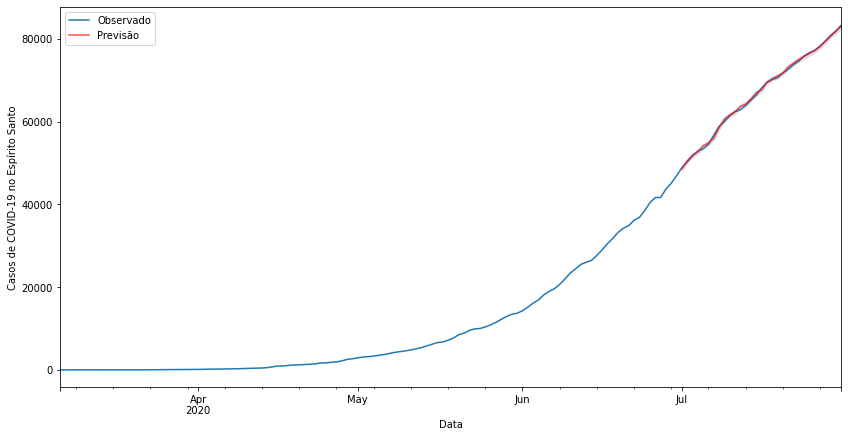

In [123]:
ax = a['2020':].plot(label='Observado')
pred_es.predicted_mean.plot(ax=ax, label='Previsão', color='r', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_es_ic.index, pred_es_ic.iloc[:,0], pred_es_ic.iloc[:,1], color='k',alpha=0.1)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19 no Espírito Santo')
plt.legend()
plt.show()

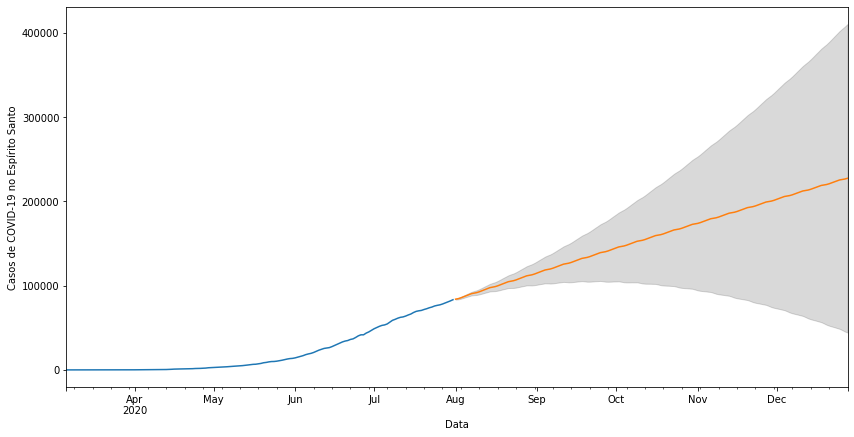

In [124]:
# Previsão
pred_uc_es = results_es.get_forecast(steps=150) # 150 dias
pred_ic_es = pred_uc_es.conf_int()
ax = a.plot(label='Observado', figsize=(14,7))
pred_uc_es.predicted_mean.plot(ax=ax,label='Previsto')
ax.fill_between(pred_ic_es.index, pred_ic_es.iloc[:,0],pred_ic_es.iloc[:,1],color='k',alpha=0.15)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19 no Espírito Santo')
plt.show()

In [125]:
df_att_es = df_att[df_att['state'] == 'ES']
df_att_es = df_att_es.rename(columns = {'date':'data'})
df_att_es.head()

,data,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
epi_week,,,,,,,,,,,,,,,,,
10,2020-03-06,Brazil,ES,TOTAL,0,0,1,1,0,1,0.0,0.02488,0.0,NaN,NaN,NaN,NaN
10,2020-03-07,Brazil,ES,TOTAL,0,0,0,1,0,1,0.0,0.02488,0.0,NaN,NaN,NaN,NaN
11,2020-03-08,Brazil,ES,TOTAL,0,0,0,1,0,1,0.0,0.02488,0.0,NaN,NaN,NaN,NaN
11,2020-03-09,Brazil,ES,TOTAL,0,0,0,1,0,1,0.0,0.02488,0.0,NaN,NaN,NaN,NaN
11,2020-03-10,Brazil,ES,TOTAL,0,0,0,1,0,1,0.0,0.02488,0.0,NaN,NaN,NaN,NaN


In [126]:
# Setando a data
df_att_es['data'] = pd.to_datetime(df_att_es['data']).dt.date
df_att_es.index = df_att_es['data']
df_att_es.head()

,data,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
data,,,,,,,,,,,,,,,,,
2020-03-06,2020-03-06,Brazil,ES,TOTAL,0,0,1,1,0,1,0.0,0.02488,0.0,NaN,NaN,NaN,NaN
2020-03-07,2020-03-07,Brazil,ES,TOTAL,0,0,0,1,0,1,0.0,0.02488,0.0,NaN,NaN,NaN,NaN
2020-03-08,2020-03-08,Brazil,ES,TOTAL,0,0,0,1,0,1,0.0,0.02488,0.0,NaN,NaN,NaN,NaN
2020-03-09,2020-03-09,Brazil,ES,TOTAL,0,0,0,1,0,1,0.0,0.02488,0.0,NaN,NaN,NaN,NaN
2020-03-10,2020-03-10,Brazil,ES,TOTAL,0,0,0,1,0,1,0.0,0.02488,0.0,NaN,NaN,NaN,NaN


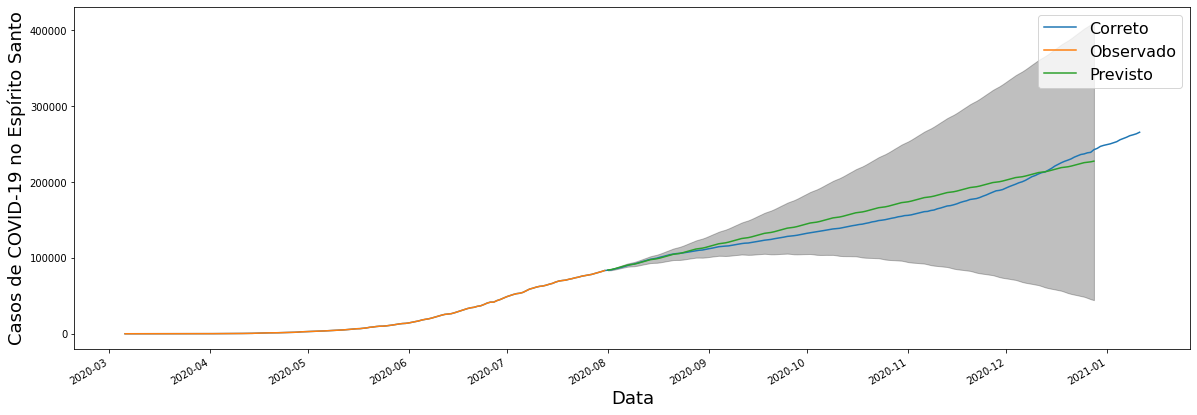

In [127]:
o = df_att_es['totalCases']
plt.figure(figsize=(20,7))
fig = plt.plot(o,label='Correto')
ax = a.plot(label='Observado')
pred_uc_es.predicted_mean.plot(ax=ax, label='Previsto')
ax.fill_between(pred_ic_es.index, pred_ic_es.iloc[:,0],pred_ic_es.iloc[:,1], color='k',alpha=0.25)
ax.set_xlabel('Data',fontsize=18)
ax.set_ylabel('Casos de COVID-19 no Espírito Santo',fontsize=18)
plt.legend(fontsize=16)

Com exceção de São Paulo, os modelos SARIMA obtiveram previsões satisfatórias.